# Inference

This notebook is to make sure anyone can do inference and produce the figures

In [1]:
import numpy as np
from astroNN.datasets import H5Loader
from astroNN.models import load_folder

# Load the dataset testing data
loader = H5Loader('__train')
loader.load_combined = False  # load individual visits
loader.load_err = False
x, y = loader.load()

# load RA, DEC, SNR entry
RA_visit = loader.load_entry('RA')
DEC_visit = loader.load_entry('DEC')
SNR_visit = loader.load_entry('SNR')

# Load model and do inference
bcnn = load_folder('astroNN_0414_run001')
bcnn.mc_num = 100
pred, pred_err = bcnn.test(x)

C:\Users\Henry\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Loaded astroNN model, model type: Bayesian Convolutional Neural Network -> ApogeeBCNN
Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 323.98s in total


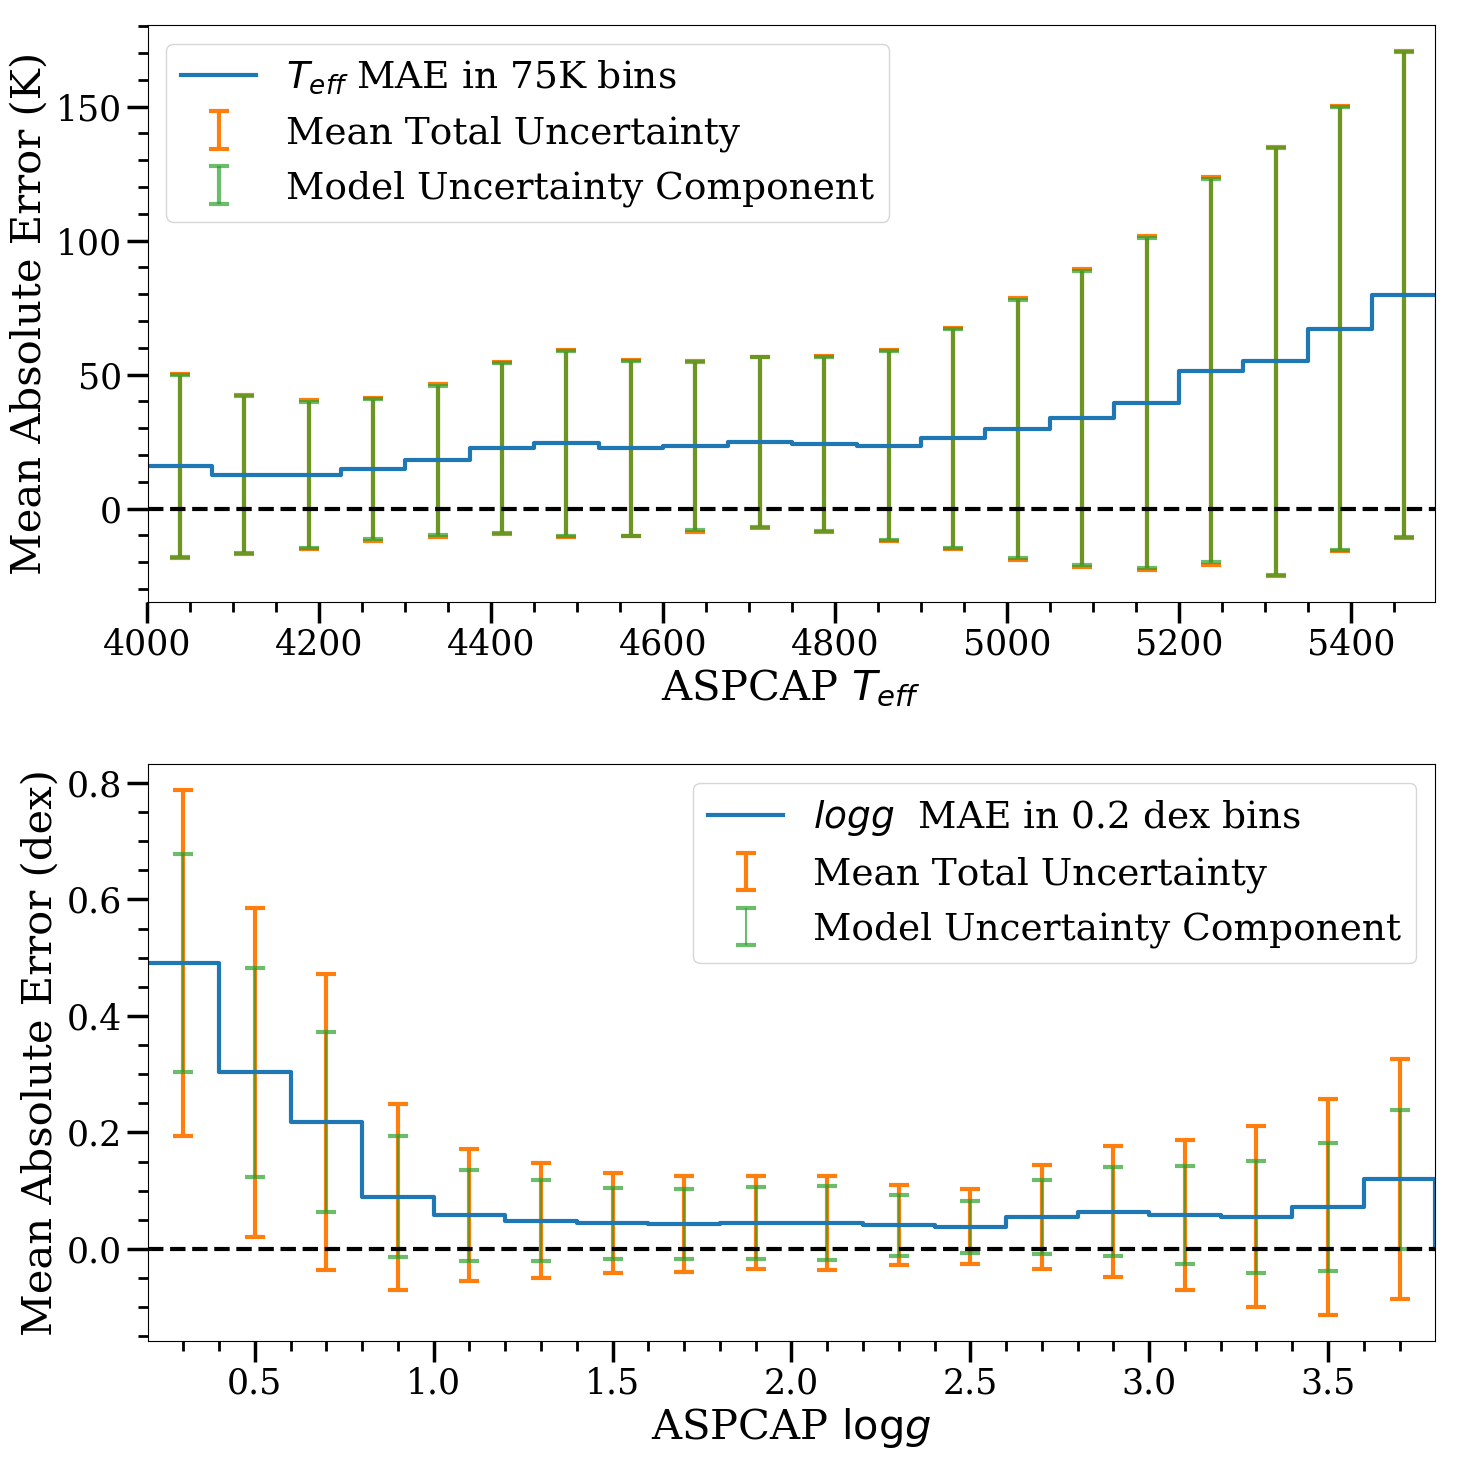

In [19]:
import pylab as plt

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

# Teff
aspcap_idx = 0
number_bin = 20
low_teff = 4000.
high_teff = 5500.
mean_abs_diff_teff = []
mean_confidence_teff = []
mean_modelconfidence_teff = []
spaces_teff = np.linspace(low_teff, high_teff, number_bin+1)

# Binning

for i in range(number_bin):
    idx = [(y[:,aspcap_idx]<spaces_teff[i+1])&(y[:,aspcap_idx]>spaces_teff[i])]
    mean_abs_diff_teff.append(np.mean(np.abs(pred[:, aspcap_idx][idx] - y[:,aspcap_idx][idx])))
    mean_confidence_teff.append(np.mean(pred_err['total'][:, aspcap_idx][idx]))
    mean_modelconfidence_teff.append(np.mean(pred_err['model'][:, aspcap_idx][idx]))

mean_abs_diff_teff.append(0.)
mean_confidence_teff.append(0.)
mean_modelconfidence_teff.append(0.)

# Log(g)
aspcap_idx = 1
number_bin = 18
low_logg = 0.2
high_logg = 3.8
mean_abs_diff_logg = []
mean_confidence_logg = []
mean_modelconfidence_logg = []
spaces_logg = np.linspace(low_logg, high_logg, number_bin+1)

# Binning
for i in range(number_bin):
    idx = [(y[:,aspcap_idx]<spaces_logg[i+1])&(y[:,aspcap_idx]>spaces_logg[i])]
    mean_abs_diff_logg.append(np.mean(np.abs(pred[:, aspcap_idx][idx] - y[:,aspcap_idx][idx])))
    mean_confidence_logg.append(np.mean(pred_err['total'][:, aspcap_idx][idx]))
    mean_modelconfidence_logg.append(np.mean(pred_err['model'][:, aspcap_idx][idx]))

mean_abs_diff_logg.append(0.)
mean_confidence_logg.append(0.)
mean_modelconfidence_logg.append(0.)

# setup plots
f, ax = plt.subplots(2,figsize=(15,15), dpi=100)

ax[0].plot(spaces_teff, mean_abs_diff_teff, ls='steps-post', linewidth=3., label='$T_{eff}$' + ' MAE in 75K bins')
ax[0].errorbar(spaces_teff+37.5, mean_abs_diff_teff, yerr=mean_confidence_teff, linestyle='None', capsize=7, elinewidth=3., capthick=3., label='Mean Total Uncertainty')
ax[0].errorbar(spaces_teff+37.5, mean_abs_diff_teff, yerr=mean_modelconfidence_teff, linestyle='None', capsize=7, elinewidth=3., capthick=3., alpha=0.7, label='Model Uncertainty Component')
ax[0].set_xlabel('ASPCAP ' +"$T_{eff}$", fontsize=30)
ax[0].set_ylabel('Mean Absolute Error (K)', fontsize=30)
ax[0].set_xlim((low_teff, high_teff-2))
ax[0].axhline(0, ls='--', c='k', lw=3.)
ax[0].legend(loc='best', fontsize=27)
ax[0].minorticks_on()
ax[0].tick_params(labelsize=25, width=2.5, length=15, which='major')
ax[0].tick_params(width=2, length=7, which='minor')

ax[1].plot(spaces_logg, mean_abs_diff_logg, ls='steps-post', linewidth=3., label='$log{g}$' + '  MAE in 0.2 dex bins')
ax[1].errorbar(spaces_logg+0.1, mean_abs_diff_logg, yerr=mean_confidence_logg, linestyle='None', capsize=7, elinewidth=3., capthick=3., label='Mean Total Uncertainty')
ax[1].errorbar(spaces_logg+0.1, mean_abs_diff_logg, yerr=mean_modelconfidence_logg, linestyle='None', capsize=7, elinewidth=0., capthick=3., alpha=0.7, label='Model Uncertainty Component')
ax[1].set_xlabel('ASPCAP ' +"$\log{g}$", fontsize=30)
ax[1].set_ylabel('Mean Absolute Error (dex)', fontsize=30)
ax[1].set_xlim((low_logg, high_logg-0.001))
ax[1].axhline(0, ls='--', c='k', lw=3.)
ax[1].legend(loc='best', fontsize=27)
ax[1].minorticks_on()
ax[1].tick_params(labelsize=25, width=2.5, length=15, which='major')
ax[1].tick_params(width=2, length=7, which='minor')

f.tight_layout()
f.savefig('delta_teff_logg.png')

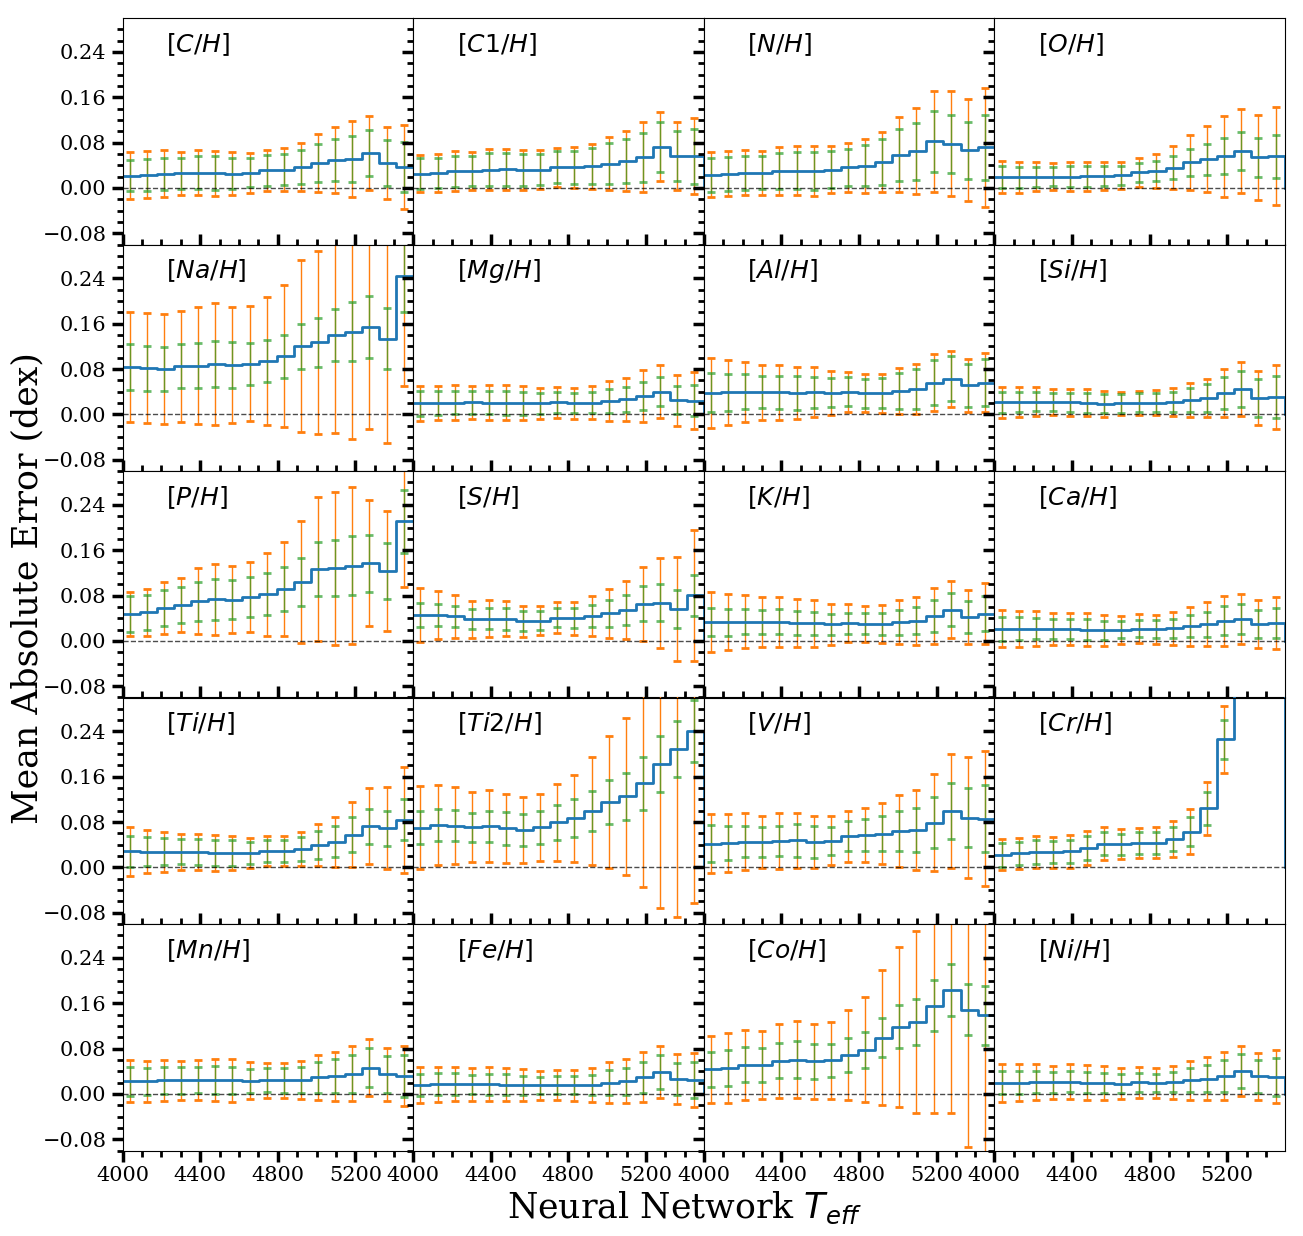

In [39]:
import pylab as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from astroNN.nn.numpy import mean_absolute_error
plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

# basic parameters
aspcap_idx = 2
number_bin = 17
low_x = -2.6
high_x = 0.8
mean_abs_diff_x = []
mean_confidence_x = []
spaces_teff_x = np.linspace(low_teff, high_teff, number_bin+1)

# setup plots
f, ax = plt.subplots(5,4,figsize=(15,15), dpi=100, sharex=True, sharey=False)

xmajorLocator = MultipleLocator(400)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 4

for i in range(5):
    for j in range(4):
        mean_abs_diff_x = []
        mean_confidence_x = []
        mean_modelconfidence_x = []
        if aspcap_idx > 23:
            aspcap_idx = 23
        
        for ii in range(number_bin):
            idx = [(pred[:,0]<spaces_teff_x[ii+1])&(pred[:,0]>spaces_teff_x[ii])]
            mean_abs_diff_x.append(mean_absolute_error(pred[:, aspcap_idx][idx], y[:,aspcap_idx][idx]))
            mean_confidence_x.append(np.mean(pred_err['total'][:, aspcap_idx][idx]))
            mean_modelconfidence_x.append(np.mean(pred_err['model'][:, aspcap_idx][idx]))

        mean_abs_diff_x.append(0.)
        mean_confidence_x.append(0.)
        mean_modelconfidence_x.append(0.)
        
        ax[i,j].plot(spaces_teff_x, mean_abs_diff_x, ls='steps-post', linewidth=2., label='$T_{eff}$')
        ax[i,j].errorbar(spaces_teff_x+37.5, mean_abs_diff_x, yerr=mean_confidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2.)
        ax[i,j].errorbar(spaces_teff_x+37.5, mean_abs_diff_x, yerr=mean_modelconfidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2., alpha=0.7)
        ax[i,j].set_xlim((low_teff, high_teff-2))
        ax[i,j].set_ylim((-0.1, 0.3))
        ax[i,j].axhline(0, ls='--', c='k', lw=1., alpha=0.7)
        ax[i,j].annotate(f"$[{bcnn.targetname[aspcap_idx]}/H]$", xy=(0.15,0.85),xycoords='axes fraction', fontsize=18)
        if j == 0:
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        else:
            ax[i,j].yaxis.set_major_formatter(NullFormatter())
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i,j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i,j].xaxis.set_tick_params(direction='in', which='both')
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(labelsize=15, width=2.5, length=8, which='major')
        ax[i,j].tick_params(width=2, length=4, which='minor')
        aspcap_idx += 1
f.text(0.5,0.08,'Neural Network ' +"$T_{eff}$",fontdict={'fontsize':25}, ha='center')
f.text(0.05,0.5,"Mean Absolute Error (dex)",fontdict={'fontsize':25},rotation=90, va='center')
f.subplots_adjust(wspace=0,hspace=0)
f.savefig('delta_xh_teff.png')

C:\Users\Henry\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Henry\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Henry\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


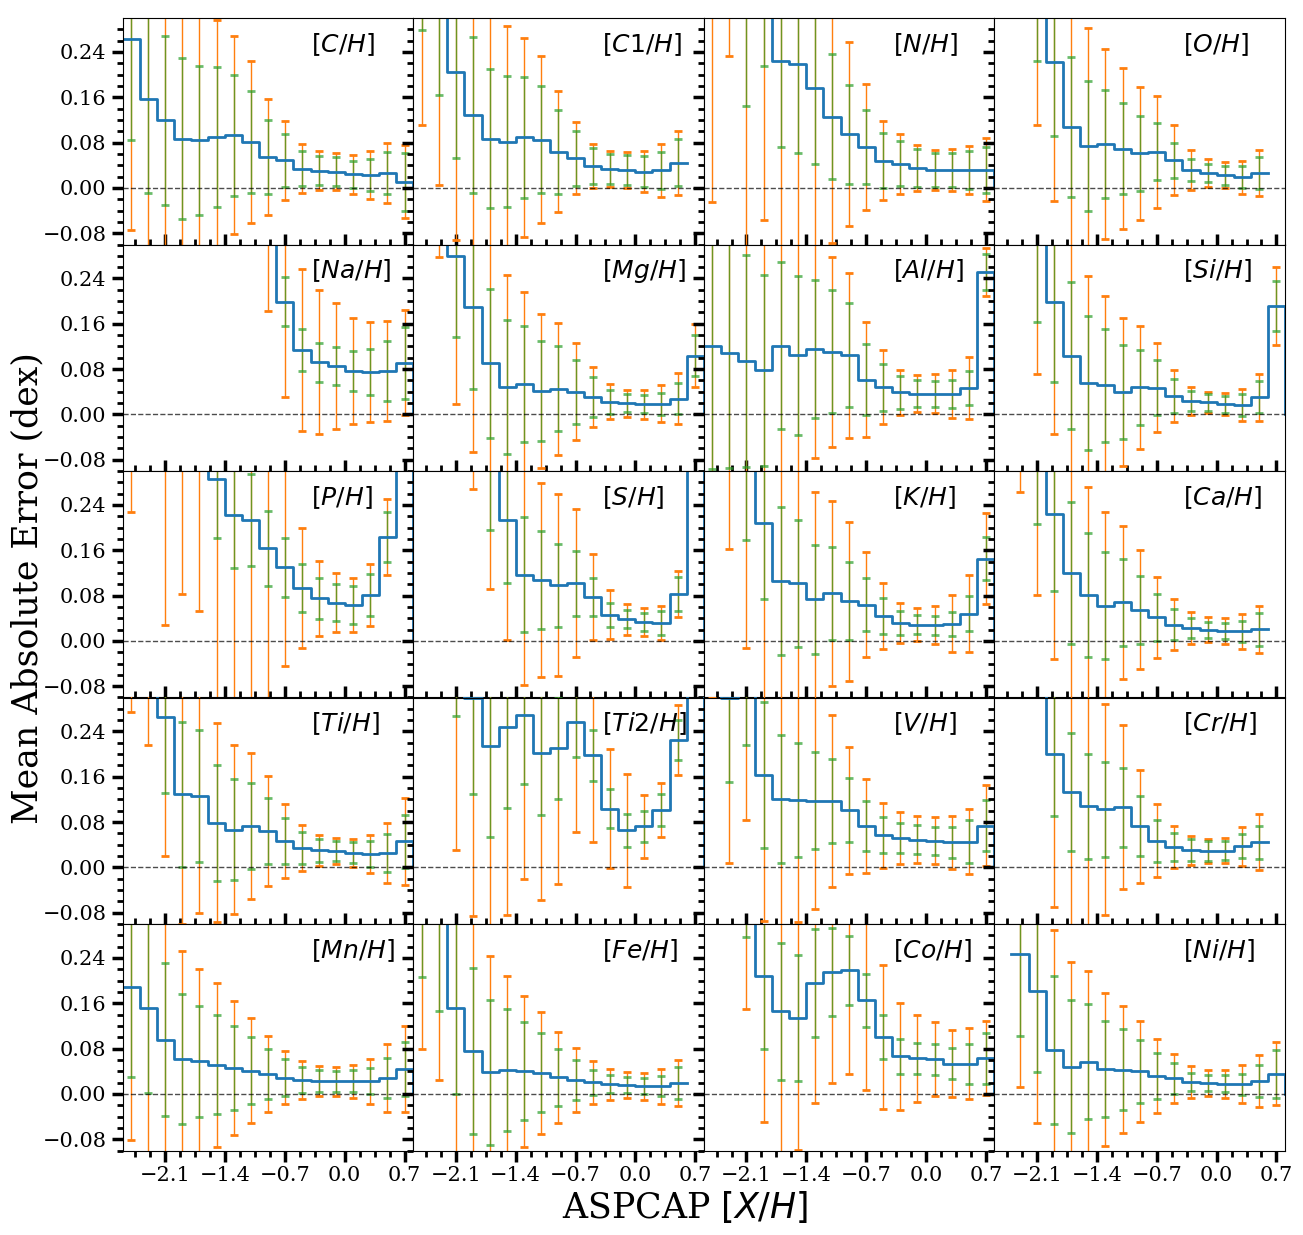

In [37]:
import pylab as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

# basic parameters
aspcap_idx = 2
number_bin = 17
low_x = -2.6
high_x = 0.8
mean_abs_diff_x = []
mean_confidence_x = []
spaces_x = np.linspace(low_x, high_x, number_bin+1)

# setup plots
f, ax = plt.subplots(5,4,figsize=(15,15), dpi=100, sharex=True, sharey=False)

xmajorLocator = MultipleLocator(0.7)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 4

for i in range(5):
    for j in range(4):
        mean_abs_diff_x = []
        mean_confidence_x = []
        mean_modelconfidence_x = []
        if aspcap_idx > 23:
            aspcap_idx = 23
        
        for ii in range(number_bin):
            idx = [(y[:,aspcap_idx]<spaces_x[ii+1])&(y[:,aspcap_idx]>spaces_x[ii])]
            mean_abs_diff_x.append(np.mean(np.abs(pred[:, aspcap_idx][idx] - y[:,aspcap_idx][idx])))
            mean_confidence_x.append(np.mean(pred_err['total'][:, aspcap_idx][idx]))
            mean_modelconfidence_x.append(np.mean(pred_err['model'][:, aspcap_idx][idx]))

        mean_abs_diff_x.append(0.)
        mean_confidence_x.append(0.)
        mean_modelconfidence_x.append(0.)
        
        ax[i,j].plot(spaces_x, mean_abs_diff_x, ls='steps-post', linewidth=2., label='$T_{eff}$')
        ax[i,j].errorbar(spaces_x+0.1, mean_abs_diff_x, yerr=mean_confidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2.)
        ax[i,j].errorbar(spaces_x+0.1, mean_abs_diff_x, yerr=mean_modelconfidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2., alpha=0.7)
        ax[i,j].set_xlim((low_x, high_x))
        ax[i,j].set_ylim((-0.1, 0.3))
        ax[i,j].axhline(0, ls='--', c='k', lw=1., alpha=0.7)
        ax[i,j].annotate(f"$[{bcnn.targetname[aspcap_idx]}/H]$", xy=(0.65,0.85),xycoords='axes fraction', fontsize=18)
        if j == 0:
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        else:
            ax[i,j].yaxis.set_major_formatter(NullFormatter())
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i,j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i,j].xaxis.set_tick_params(direction='in', which='both')
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(labelsize=15, width=2.5, length=8, which='major')
        ax[i,j].tick_params(width=2, length=4, which='minor')
        aspcap_idx += 1
        
f.text(0.5,0.08,"ASPCAP "+"$[X/H]$",fontdict={'fontsize':25}, ha='center')
f.text(0.05,0.5,"Mean Absolute Error (dex)",fontdict={'fontsize':25},rotation=90, va='center')
f.subplots_adjust(wspace=0,hspace=0)
f.savefig('compact_test.png')

# Inference at different SNR to test Neural Network Performance

First load the combined spectra

In [6]:
import numpy as np
from astroNN.datasets import H5Loader
from astroNN.models import load_folder

# Load the dataset testing data
loader2 = H5Loader('__train')
loader2.load_combined = True  # load combine visits
loader2.load_err = False
x_combined, y_combined = loader2.load()

# load RA, DEC, SNR entry
RA_combined = loader2.load_entry('RA')
DEC_combined = loader2.load_entry('DEC')
SNR_combined = loader2.load_entry('SNR')

pred_combined, pred_combined_err = bcnn.test(x_combined)

Starting Dropout Variational Inference
Completed Dropout Variational Inference with 100 forward passes, 114.29s in total


### Cross Matching Individual Spectra Prediction and Combined Spectra Prediction to see the effect of SNR

We want to know the neural network prediction difference between high SNR and corresponding low SNR individual spectra

In [7]:
from astroNN.datasets import xmatch

idx_1, idx_2, sep = xmatch(RA_visit, RA_combined, colRA1=RA_visit, colDec1=DEC_visit, colRA2=RA_combined, colDec2=DEC_combined)

# Absolute Difference
abs_diff = np.abs(pred[idx_1] - pred_combined[idx_2])

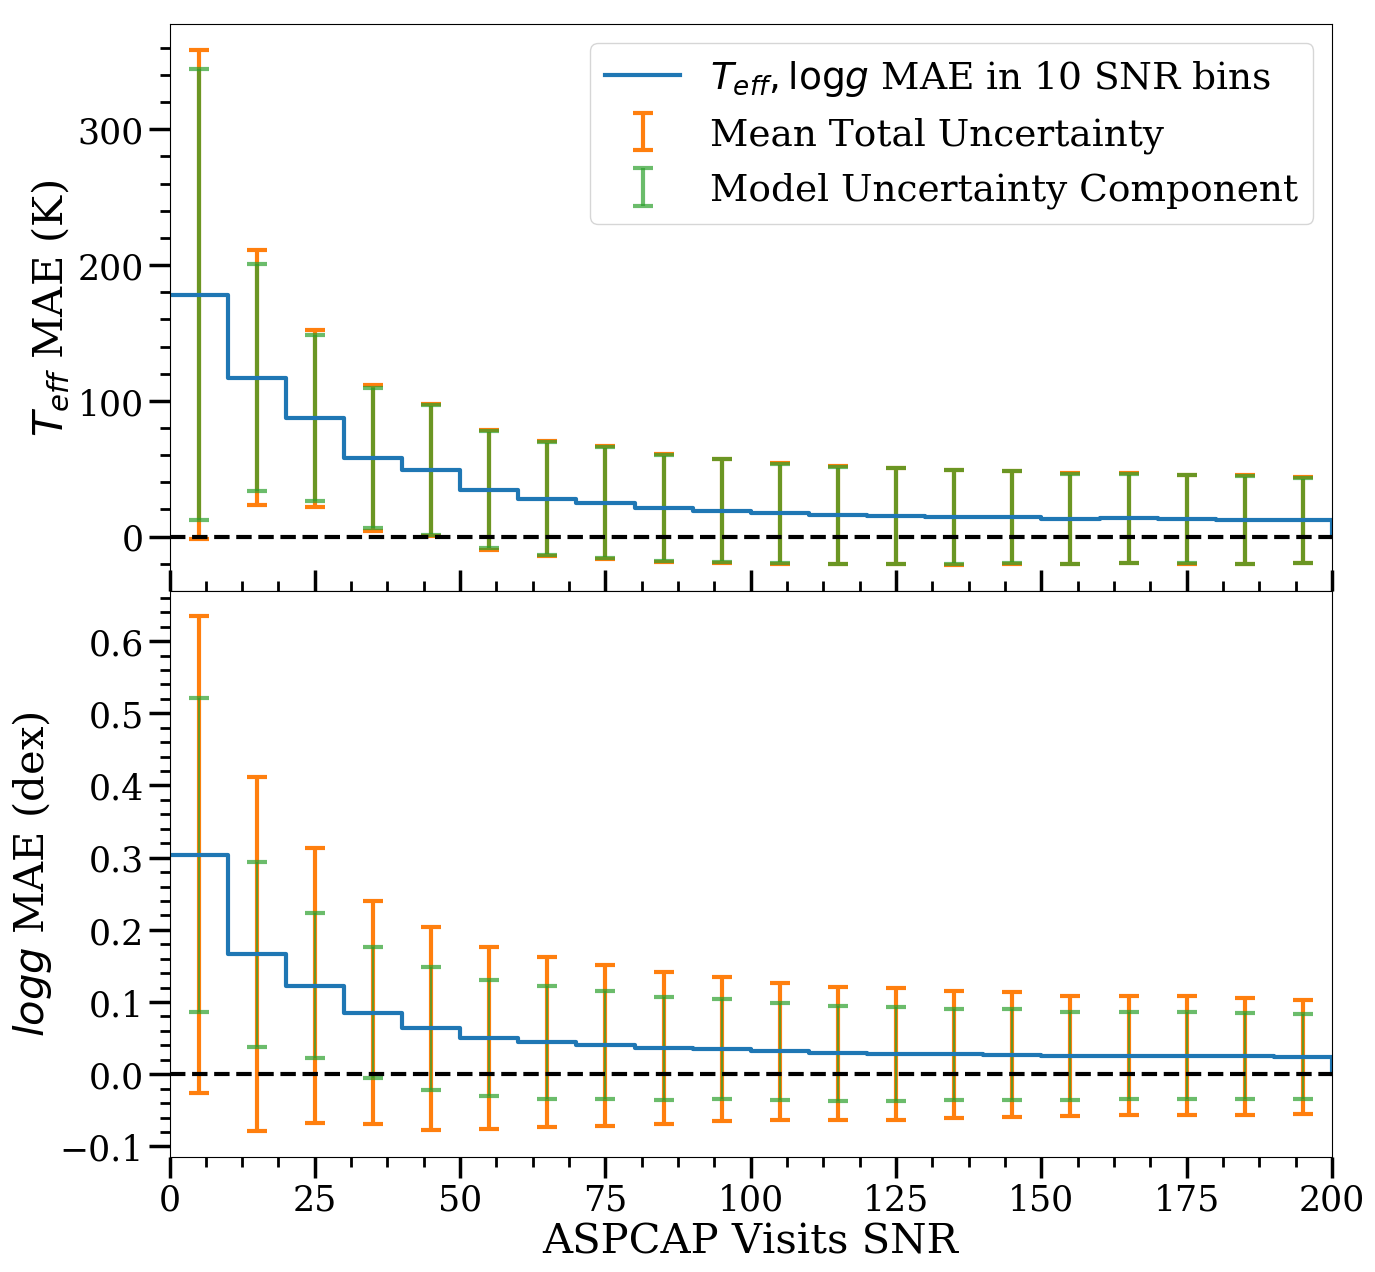

In [41]:
import pylab as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

# Teff
aspcap_idx = 0
number_bin = 20
low_SNR = 0.
high_SNR = 200.
mean_abs_diff_teff = []
mean_confidence_teff = []
mean_modelconfidence_teff = []
spaces_SNR = np.linspace(low_SNR, high_SNR, number_bin+1)

# Binning

for i in range(number_bin):
    idx = [(SNR_visit[idx_1]<spaces_SNR[i+1])&(SNR_visit[idx_1]>spaces_SNR[i])]
    mean_abs_diff_teff.append(np.mean(abs_diff[:,aspcap_idx][idx_1][idx]))
    mean_confidence_teff.append(np.mean(pred_err['total'][:, aspcap_idx][idx_1][idx]))
    mean_modelconfidence_teff.append(np.mean(pred_err['model'][:, aspcap_idx][idx_1][idx]))

mean_abs_diff_teff.append(0.)
mean_confidence_teff.append(0.)
mean_modelconfidence_teff.append(0.)

# Log(g)
aspcap_idx = 1
number_bin = 20
mean_abs_diff_logg = []
mean_confidence_logg = []
mean_modelconfidence_logg = []
spaces_logg = np.linspace(low_logg, high_logg, number_bin+1)

# Binning
for i in range(number_bin):
    idx = [(SNR_visit[idx_1]<spaces_SNR[i+1])&(SNR_visit[idx_1]>spaces_SNR[i])]
    mean_abs_diff_logg.append(np.mean(abs_diff[:,aspcap_idx][idx_1][idx]))
    mean_confidence_logg.append(np.mean(pred_err['total'][:, aspcap_idx][idx_1][idx]))
    mean_modelconfidence_logg.append(np.mean(pred_err['model'][:, aspcap_idx][idx_1][idx]))

mean_abs_diff_logg.append(0.)
mean_confidence_logg.append(0.)
mean_modelconfidence_logg.append(0.)

# setup plots
f, ax = plt.subplots(2, figsize=(15,15), dpi=100)

xSNRmajorLocator = MultipleLocator(0.7)

ax[0].plot(spaces_SNR, mean_abs_diff_teff, ls='steps-post', linewidth=3., label='$T_{eff}, \log{g}$' + ' MAE in 10 SNR bins')
ax[0].errorbar(spaces_SNR+5, mean_abs_diff_teff, yerr=mean_confidence_teff, linestyle='None', capsize=7, elinewidth=3., capthick=3., label='Mean Total Uncertainty')
ax[0].errorbar(spaces_SNR+5, mean_abs_diff_teff, yerr=mean_modelconfidence_teff, linestyle='None', capsize=7, elinewidth=3., capthick=3., alpha=0.7, label='Model Uncertainty Component')
ax[0].set_ylabel('$T_{eff}$'+' MAE (K)', fontsize=30)
ax[0].set_xlim((low_SNR, high_SNR))
# ax[0].set_ylim((-20, 200))
ax[0].axhline(0, ls='--', c='k', lw=3.)
ax[0].legend(loc='best', fontsize=27)
ax[0].minorticks_on()
ax[0].tick_params(labelsize=25, width=2.5, length=15, which='major')
ax[0].tick_params(width=2, length=7, which='minor')
ax[0].xaxis.set_tick_params(direction='in', which='both')
ax[0].xaxis.set_major_formatter(NullFormatter())

ax[1].plot(spaces_SNR, mean_abs_diff_logg, ls='steps-post', linewidth=3., label='$log{g}$' + '  MAE in 0.2 dex bins')
ax[1].errorbar(spaces_SNR+5, mean_abs_diff_logg, yerr=mean_confidence_logg, linestyle='None', capsize=7, elinewidth=3., capthick=3., label='Mean Total Uncertainty')
ax[1].errorbar(spaces_SNR+5, mean_abs_diff_logg, yerr=mean_modelconfidence_logg, linestyle='None', capsize=7, elinewidth=0., capthick=3., alpha=0.7, label='Model Uncertainty Component')
ax[1].set_xlabel('ASPCAP Visits SNR', fontsize=30)
ax[1].set_ylabel('$log{g}$'+' MAE (dex)', fontsize=30)
ax[1].set_xlim((low_SNR, high_SNR))
# ax[1].set_ylim((-0.1, 0.4))
ax[1].axhline(0, ls='--', c='k', lw=3.)
ax[1].minorticks_on()
ax[1].tick_params(labelsize=25, width=2.5, length=15, which='major')
ax[1].tick_params(width=2, length=7, which='minor')
f.subplots_adjust(wspace=0,hspace=0)
# f.tight_layout()
f.savefig('delta_SNR_teff_logg.png')

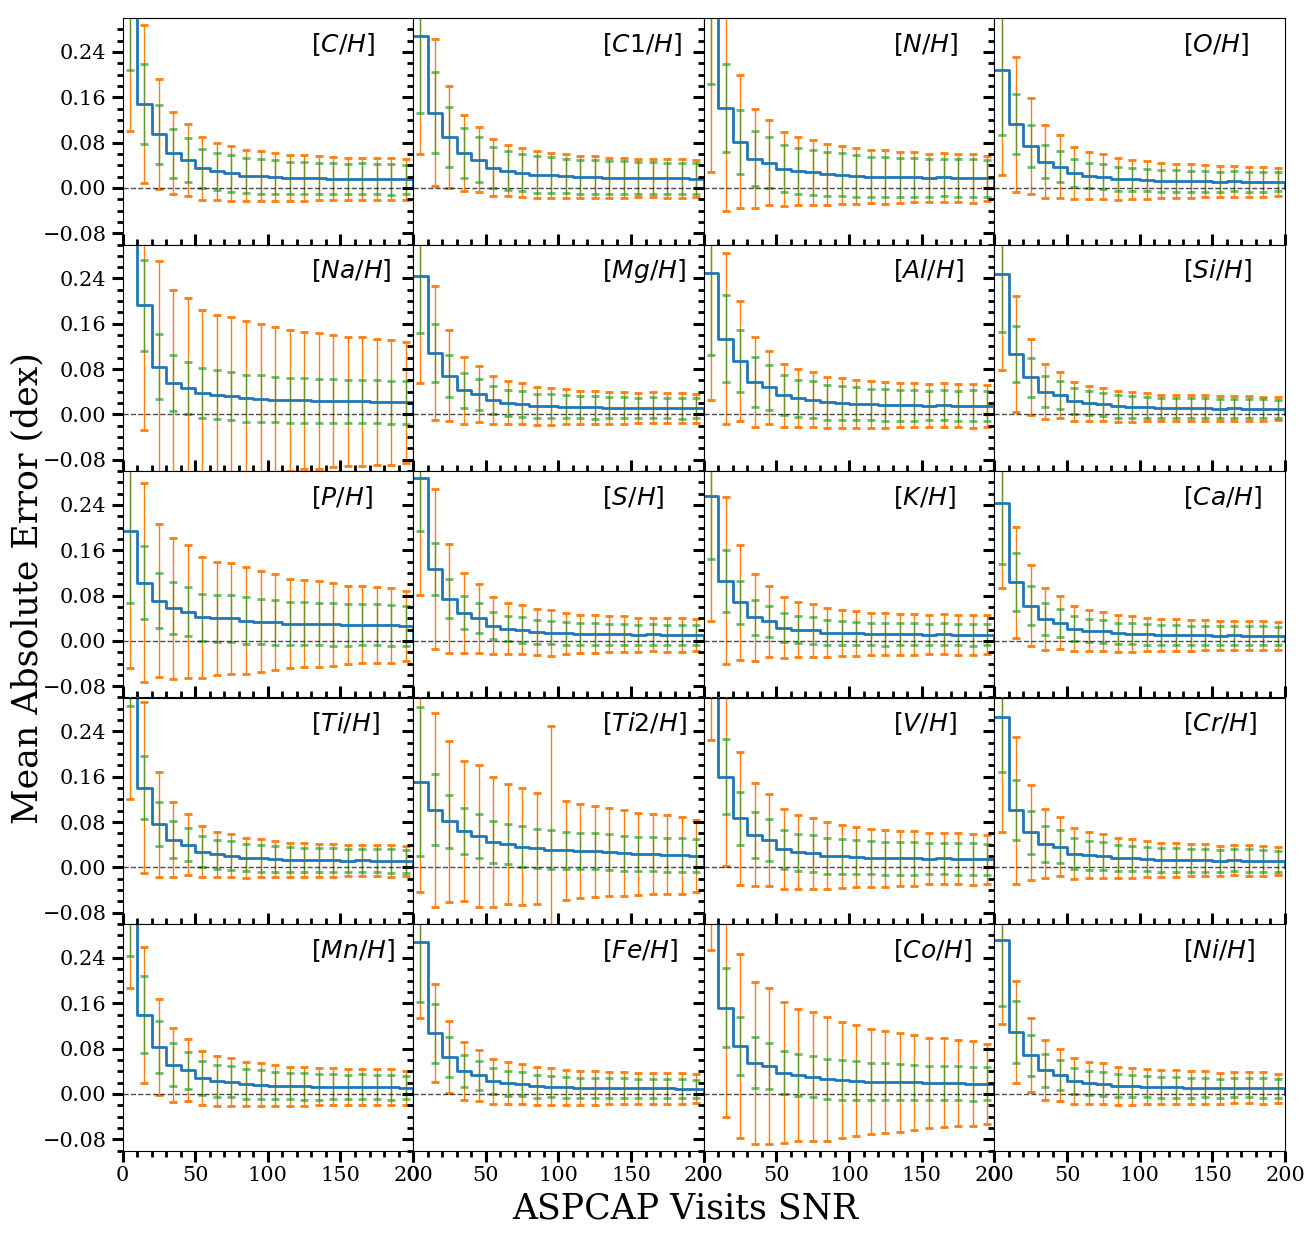

In [42]:
import pylab as plt
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter

plt.rc('font',**{'family': 'serif', 'weight':'medium', 'size':20})

# basic parameters
aspcap_idx = 2
number_bin = 20
mean_abs_diff_x = []
mean_confidence_x = []
low_SNR = 0.
high_SNR = 200.
spaces_SNR = np.linspace(low_SNR, high_SNR, number_bin+1)
# setup plots
f, ax = plt.subplots(5,4,figsize=(15,15), dpi=100, sharex=True, sharey=False)

xmajorLocator = MultipleLocator(50)
ymajorLocator = MultipleLocator(0.08)

aspcap_idx = 4

for i in range(5):
    for j in range(4):
        mean_abs_diff_x = []
        mean_confidence_x = []
        mean_modelconfidence_x = []
        if aspcap_idx > 23:
            aspcap_idx = 23
        
        for ii in range(number_bin):            
            idx = [(SNR_visit[idx_1]<spaces_SNR[ii+1])&(SNR_visit[idx_1]>spaces_SNR[ii])]
            mean_abs_diff_x.append(np.mean(abs_diff[:,aspcap_idx][idx_1][idx]))
            mean_confidence_x.append(np.mean(pred_err['total'][:, aspcap_idx][idx_1][idx]))
            mean_modelconfidence_x.append(np.mean(pred_err['model'][:, aspcap_idx][idx_1][idx]))

        mean_abs_diff_x.append(0.)
        mean_confidence_x.append(0.)
        mean_modelconfidence_x.append(0.)
        
        ax[i,j].plot(spaces_SNR, mean_abs_diff_x, ls='steps-post', linewidth=2., label='$T_{eff}$')
        ax[i,j].errorbar(spaces_SNR+5, mean_abs_diff_x, yerr=mean_confidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2.)
        ax[i,j].errorbar(spaces_SNR+5, mean_abs_diff_x, yerr=mean_modelconfidence_x, linestyle='None', capsize=3, elinewidth=1., capthick=2., alpha=0.7)
        ax[i,j].set_xlim((low_SNR, high_SNR))
        ax[i,j].set_ylim((-0.1, 0.3))
        ax[i,j].axhline(0, ls='--', c='k', lw=1., alpha=0.7)
        ax[i,j].annotate(f"$[{bcnn.targetname[aspcap_idx]}/H]$", xy=(0.65,0.85),xycoords='axes fraction', fontsize=18)
        if j == 0:
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        else:
            ax[i,j].yaxis.set_major_formatter(NullFormatter())
            ax[i,j].yaxis.set_major_locator(ymajorLocator)
        if i == 4:
            ax[i,j].xaxis.set_major_locator(xmajorLocator)
        else:
            ax[i,j].xaxis.set_tick_params(direction='in', which='both')
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(labelsize=15, width=2.2, length=8, which='major')
        ax[i,j].tick_params(width=2, length=4, which='minor')
        aspcap_idx += 1
        
f.text(0.5,0.08,"ASPCAP Visits SNR",fontdict={'fontsize':25}, ha='center')
f.text(0.05,0.5,"Mean Absolute Error (dex)",fontdict={'fontsize':25},rotation=90, va='center')
f.subplots_adjust(wspace=0,hspace=0)
f.savefig('delta_SNR_XH.png')